In [1]:
import numpy as np
import astropy.units as u

import matplotlib.pyplot as plt

import poppy

wavelength = 656*u.nm
diam = 25.8*u.mm
npix = 512

wf = poppy.FresnelWavefront(beam_radius=diam/2, npix=npix, oversample=1)




Oversampling > 2x suggested for reliable results in Fresnel propagation.


In [27]:
dk = 1/(screen_size * wf.pixelscale * u.pix)
psd_units = psd_params['beta'].unit / ((dk.unit**2)**(psd_params['alpha']/2))
psd_units.decompose(), psd_params['surf_roughness'].unit.decompose()
# psd_params['surf_roughness'].unit == psd_units
# psd_params['surf_roughness'].unit.decompose() == psd_units.decompose()

(Unit("1e-18 m4"), Unit("1e-18 m4"))

In [28]:
alpha = 1.55
psd_params = {
    'alpha':alpha,
    'beta':0.637*u.nm**2 / (u.m**(alpha-2)),
    'outer_scale':0.1*u.m,
    'inner_scale':0.0003,
    'surf_roughness':1e-8 * u.m**2 * u.nm**2,
}

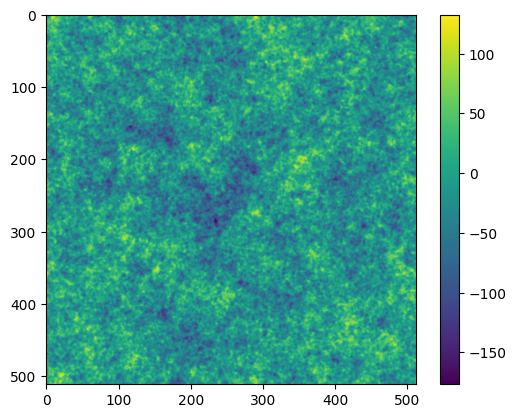

In [36]:
psd_list = [[psd_params['alpha'], psd_params['beta'],
             psd_params['outer_scale'], psd_params['inner_scale'], psd_params['surf_roughness']]]

psd_weight = [1]
incident_angle = 0*u.degree

seed = 123456
screen_size = int(npix*1)

wfe = poppy.PowerSpectrumWFE(psd_parameters=psd_list, 
                             psd_weight=psd_weight,
                             incident_angle=incident_angle,
                             apply_reflection=True,
                             seed=seed, 
                             screen_size=screen_size,
                            )

psd_opd = wfe.get_opd(wf)*1e9

plt.imshow(psd_opd.get())
plt.colorbar()